In [35]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import glob
from scipy.stats.mstats import gmean

In [55]:
path_float_data = "./"
functions = ['lr-serving', 'pyaes', 'rnn-serving', 'chameleon']
functions_bck = ['cnn-serving', 'float', 'linpack', 'mat-mul']
functions_full = ['cnn-serving', 'float', 'lr-serving', 'linpack', 'mat-mul', 'pyaes', 'rnn-serving', 'chameleon']
default_resp_time = [195.77, 1310, 24.7, 942.02, 463.48, 19.38, 48.27, 53.19]
geo_resp_time =     [190.45, 1250, 22.88, 866.05, 425.83, 19.13, 47.39, 48.94]
carbon_resp_time =  [212.58, 1470, 26.78, 1010, 513.4, 21.04, 55.45, 60.69]

default_pod_placement = [60.7, ]
geo_pod_placement = [0, 0, 0, 0, 0, 0, 0, 0]
carbon_pod_placement = [100, 100, 100, 100, 100, 100, 100, 100]

emission_default_gram = [180.2062069, 176.1339705, 173.8816848, 183.2682169, 179.5367863, 179.0161664, 179.5367863, 196.4592695]
emission_geo_gram = [192.6619485, 191.2115103, 187.1146109, 194.1342298, 197.1463013, 196.4775437, 197.1463013, 213.7000568]
emission_carbon_gram = [174.0941995, 171.3521396, 147.6822593, 171.1443316, 169.230609, 153.8401882, 169.230609, 182.4581753] 


emission_default_int = [180, 176, 173, 183, 179, 179, 179, 196]
emission_geo_int = [192, 191, 187, 194, 197, 196, 197, 213]
emission_carbon_int = [174, 171, 147, 171, 169, 153, 169, 182] 

emission_default_int_mg = [60, 41, 112, 125, 417, 1961, 1909, 987]
emission_geo_int_mg = [65, 45, 123, 136, 445, 2128, 2022, 1083]
emission_carbon_int_mg = [51, 35, 105, 116, 402, 1907, 1782, 930] 

emission_default_int_microg = [60, 41, 112, 125]
emission_geo_int_microg = [65, 45, 123, 136]
emission_carbon_int_microg = [51, 35, 105, 116] 

emission_default_int_microg_long = [417, 1961, 1909, 987]
emission_geo_int_microg_long = [445, 2128, 2022, 1083]
emission_carbon_int_microg_long = [402, 1907, 1782, 930]


pod_placement_default = [73, 71, 50, 74, 75, 21, 75, 68]
pod_placement_geo = [47, 50, 0, 58, 49, 0, 50, 37]
pod_placement_carbon = [100, 100, 100, 100, 100, 100, 100, 100]

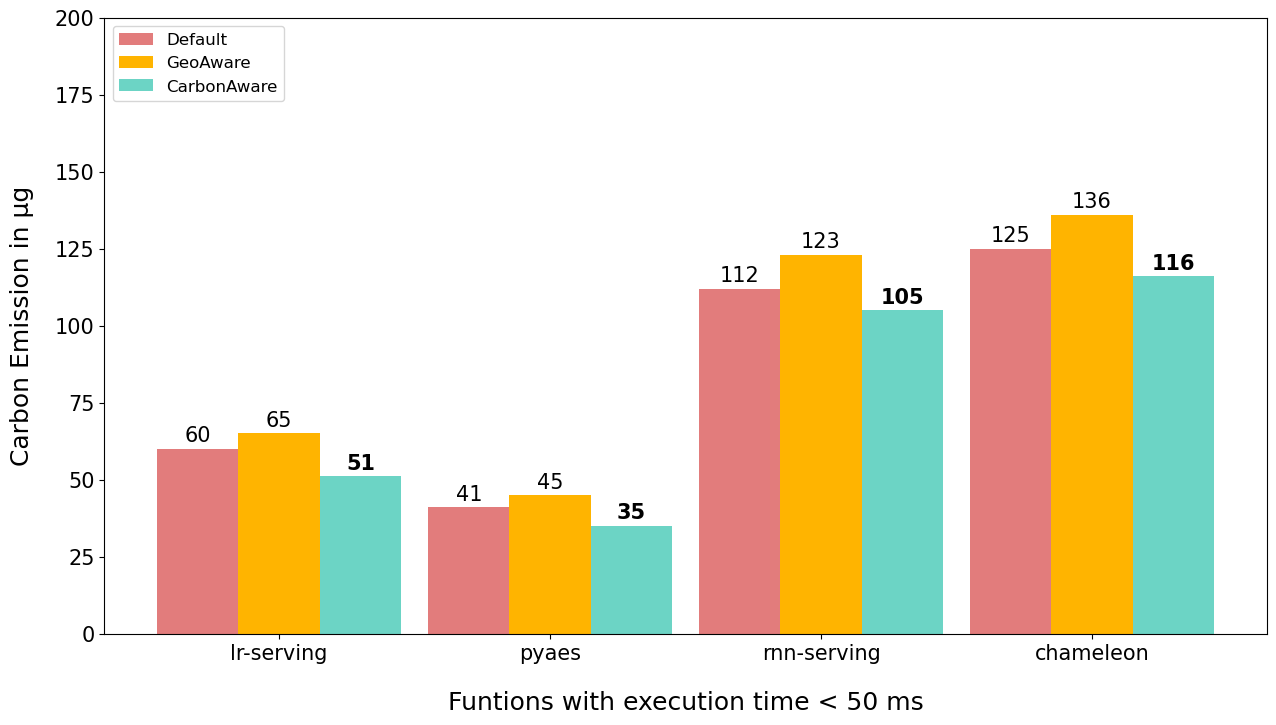

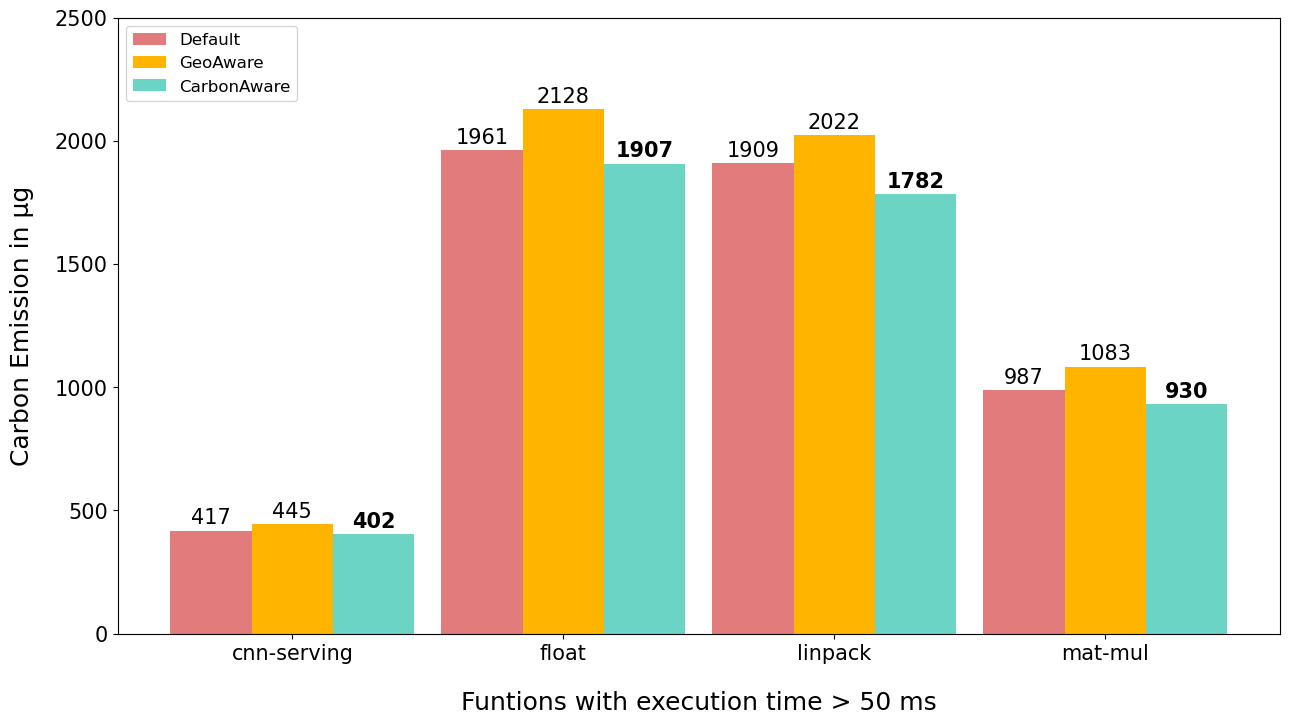

In [112]:
from matplotlib import rc, rcParams
rc('font', weight='normal')
fig0, ax0 = plt.subplots(figsize=(15,8))

x = np.arange(len(functions))
width = 0.3

threads_default = ax0.bar(x - width * 1, emission_default_int_microg, width, label='Default', color='#e27c7c', alpha=1)
threads_geo = ax0.bar(x + width * 0, emission_geo_int_microg, width, label='GeoAware', color='#ffb400', alpha=1)
threads_carbon = ax0.bar(x + width * 1, emission_carbon_int_microg, width, label='CarbonAware', color='#6cd4c5', alpha=1)

ax0.set_xlabel('Funtions with execution time < 50 ms', size=18.0)
ax0.set_ylabel('Carbon Emission in μg', size=18.0)
#ax.tick_params(axis='x', labelsize=6)
ax0.set_xticks(x, rotation=0, fontsize=2)
ax0.set_xticklabels(functions, rotation=0, fontsize=2)

#ticks = [1, 10, 50, 100, 200, 400, 800, 1600]
#ax.set_yticks(ticks)
#ax.set_yticklabels(ticks)

ax0.legend(prop={'size': 12}, loc='upper left', ncol=1)

ax0.bar_label(threads_default, padding=2, size=15)
ax0.bar_label(threads_geo, padding=2, size=15)
ax0.bar_label(threads_carbon, padding=2, size=15, fontweight='bold')

ax0.set_ylim([0, 200])

ax0.tick_params(axis='both', labelsize = 15.0)
ax0.xaxis.labelpad = 20
ax0.yaxis.labelpad = 15

#ax.grid(axis="both", color="0.8", linestyle='-', linewidth=1)
ax0.set_axisbelow(True)


##################################

fig1, ax1 = plt.subplots(figsize=(15,8))
y = np.arange(len(functions_bck))
width = 0.3

threads_default_long = ax1.bar(x - width * 1, emission_default_int_microg_long, width, label='Default', color='#e27c7c', alpha=1)
threads_geo_long = ax1.bar(x + width * 0, emission_geo_int_microg_long, width, label='GeoAware', color='#ffb400', alpha=1)
threads_carbon_long = ax1.bar(x + width * 1, emission_carbon_int_microg_long, width, label='CarbonAware', color='#6cd4c5', alpha=1)

ax1.set_xlabel('Funtions with execution time > 50 ms', size=18.0)
ax1.set_ylabel('Carbon Emission in μg', size=18.0)
#ax[1].set_ylabel('Carbon Emission in micrograms/invocation', size=18.0)
#ax.tick_params(axis='x', labelsize=6)
ax1.set_xticks(y, rotation=0, fontsize=2)
ax1.set_xticklabels(functions_bck, rotation=0, fontsize=2)

ax1.legend(prop={'size': 12}, loc='upper left', ncol=1)

ax1.bar_label(threads_default_long, padding=2, size=15)
ax1.bar_label(threads_geo_long, padding=2, size=15)
ax1.bar_label(threads_carbon_long, padding=2, size=15, fontweight='bold')

ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', labelsize = 15.0)

#ax.grid(axis="both", color="0.8", linestyle='-', linewidth=1)
ax1.set_axisbelow(True)
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 15
fig.tight_layout()
plt.show()

fig0.savefig('carboncompare_v2_1.png', dpi=300)
fig1.savefig('carboncompare_v2_2.png', dpi=300)


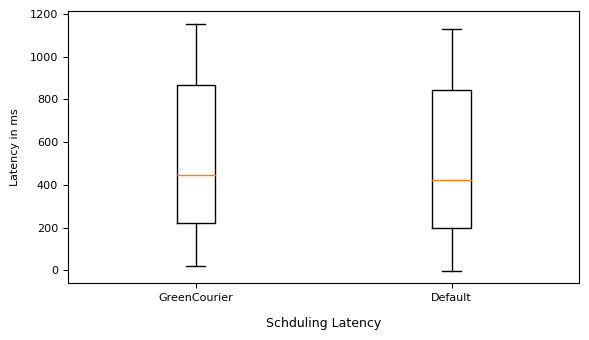

In [116]:
carbon_scheduler_latency = [605, 679, 764, 744, 794, 830, 874, 899, 1004, 36, 47, 48, 146, 177, 177, 321, 344, 362, 344, 345, 358, 424, 425, 549, 549, 572, 844, 987, 991, 1137, 1140, 1155, 387, 388, 441, 441, 586, 573, 971, 988, 824, 573, 590, 1086, 1096, 1097, 1097, 111, 115, 115, 194, 435, 208, 355, 220, 455, 511, 590, 612, 411, 567, 530, 530, 797, 862, 882, 1007, 1008, 967, 1007, 1008, 862, 863, 863, 863, 863, 1009, 956, 1016, 155, 148, 218, 956, 148, 955, 218, 219, 223, 153, 409, 147, 463, 152, 882, 223, 154, 955, 955, 365, 366, 955, 967, 254, 240, 145, 21, 147, 144, 264, 156, 145, 366, 282, 254, 255, 155, 367, 255, 370, 447, 464, 146, 449, 448, 448, 153, 219, 219, 366, 366, 792, 875, 875, 1014, 1033, 210]
default_scheduler_latency = [947, 184, 153, 417, 566, 548, 980, 839, 129, 967, 1072, 364, 131, 985, 186, 549, 549, 342, 839, 543, 943, 124, 770, 387, 342, 838, 487, 562, 123, 153, 851, 820, 342, 850, 129, 258, 983, 839, 170, 231, 195, 130, 385, 983, 12, 931, 400, 984, 194, 431, 806, 121, 87, 990, 122, 932, 963, 346, 194, 231, 320, 581, 992, 943, 120, 838, 23, 199, 297, 424, 931, 1073, 839, 132, 343, 195, 1009, 230, 566, 123, 91, 525, 525, 417, 131, 1116, 1073, 321, 363, 1062, 931, 196, 858, 24, -3, 800, 858, 740, 931, 440, 122, 425, 655, 401, 439, 334, 320, 851, 216, 506, 341, 338, 588, 91, 964, 195, 424, 199, 1113, 411, 984, 506, 128, 331, 768, 720, 773, 124, 423, 121, 932, 875, 240, 230, 1131, 342]

scheduler_latency = [carbon_scheduler_latency, default_scheduler_latency]
fig, ax = plt.subplots(figsize =(6, 3.5))
#fig.suptitle('Scheduling Latency of Pods - Creation to Node Assignment', size=10)
ax.set_xlabel('Schduling Latency', size=9)
ax.set_ylabel('Latency in ms', size=8)


fig.tight_layout()
ax.boxplot(scheduler_latency)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 7
plt.xticks([1, 2], ['GreenCourier', 'Default'])
plt.tick_params(axis='both', labelsize = 8.0)
plt.show()
fig.savefig('boxplot1.png', dpi=300)

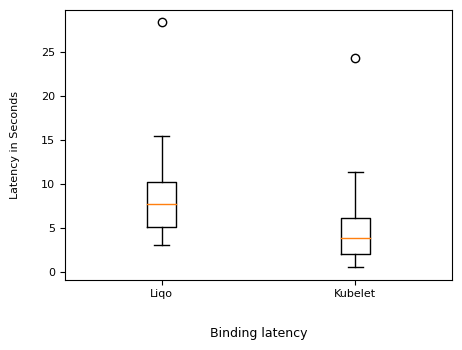

In [100]:
liqo_latency = [5.39, 10.32, 10.24, 11.26, 11.21, 11.17, 10.13, 11.10, 12.00, 12.96, 10.95, 8.95, 12.85, 14.82, 12.82, 14.68, 11.66, 9.64, 7.66, 13.65, 14.64, 10.58, 12.57, 15.45, 11.45, 13.43, 15.16, 13.01, 9.01, 13.86, 14.86, 10.85, 10.61, 11.61, 7.56, 5.56, 4.41, 4.43, 4.03, 6.01, 5.18, 28.43, 11.41, 6.91, 8.90, 9.90, 10.90, 8.89, 6.88, 4.89, 8.81, 8.56, 8.79, 6.64, 3.78, 8.54, 9.49, 9.41, 5.39, 5.59, 9.43, 8.47, 7.47, 8.20, 7.14, 9.12, 4.99, 7.99, 4.03, 6.99, 8.99, 8.14, 9.14, 7.14, 9.14, 6.14, 6.99, 4.04, 8.98, 4.85, 4.85, 12.78, 7.04, 14.85, 4.04, 7.78, 8.78, 13.78, 4.85, 3.59, 6.85, 4.54, 8.85, 4.12, 6.78, 3.85, 3.05, 4.04, 13.64, 4.63, 3.05, 5.03, 4.75, 4.76, 6.86, 8.98, 7.85, 6.86, 5.74, 4.84, 4.86, 9.63, 4.72, 7.75, 6.74, 5.85, 4.63, 4.74, 9.63, 4.55, 7.54, 6.85, 5.55, 4.55, 4.55, 9.85, 4.78, 7.78, 9.63, 4.63, 7.21, 6.12, 5.13, 8.99, 3.97, 6.79]
kubelete_latency = [7.906, 0.757, 1.461, 3.38, 2.035, 24.337, 3.656, 6.146, 2.764, 2.687, 1.922, 1.462, 8.923, 0.762, 4.716, 8.692, 3.566, 5.028, 7.361, 5.399, 8.733, 4.896, 0.655, 1.469, 7.08, 9.338, 4.057, 2.901, 2.824, 3.446, 2.028, 10.77, 4.902, 5.757, 5.544, 5.544, 2.447, 10.733, 6.231, 3.046, 3.499, 3.67, 11.066, 4.702, 4.889, 8.764, 1.755, 6.523, 2.954, 0.543, 1.298, 7.522, 9.545, 10.552, 2.655, 6.755, 3.045, 1.305, 11.361, 10.762, 6.486, 4.814, 0.903, 9.687, 3.763, 0.691, 5.54, 5.343, 5.047, 5.045, 1.086, 3.469, 5.047, 4.113, 0.795, 2.045, 1.324, 8.485, 2.765, 6.863, 1.244, 6.813, 2.7, 1.337, 2.795, 2.765, 7.166, 4.862, 2.047, 2.061, 0.628, 7.011, 4.758, 0.943, 9.565, 5.32, 3.692, 3.047, 1.646, 9.773, 1.035, 2.555, 3.118, 7.116, 10.589, 4.455, 7.566, 0.656, 0.755, 1.045, 4.38, 2.903, 4.894, 1.499, 8.874, 2.766, 7.32, 5.813, 4.048, 6.036, 4.475, 2.31, 2.763, 4.919, 1.462, 3.048, 1.463, 1.123, 0.544, 3.902, 4.799, 3.691, 0.754, 0.544, 5.548, 4.691]


status_sync_latency = [liqo_latency, kubelete_latency]

fig, ax = plt.subplots(figsize =(5, 3.5))
#fig.suptitle('Latency of Pods - Node Assignment to Running state', size=10)
ax.set_xlabel('Binding latency', size=9)
ax.set_ylabel('Latency in Seconds', size=8.0)

ax.boxplot(status_sync_latency)
plt.xticks([1, 2], ['Liqo', 'Kubelet'])
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 15
plt.tick_params(axis='both', labelsize = 8.0)
plt.show()
fig.savefig('boxplot2.png', dpi=300)

In [52]:
def get_change(current, previous):
    if current == previous:
        return 100.0
    try:
        return (abs(current - previous) / previous) * 100.0
    except ZeroDivisionError:
        return 0
    
def get_change1(current, previous):
    if current == previous:
        return 100.0
    try:
        return (abs(current - previous) / current) * 100.0
    except ZeroDivisionError:
        return 0
    
def Average(lst):
    return sum(lst) / len(lst)

In [32]:
default_resp_time = [195.77, 1310, 24.7, 942.02, 463.48, 19.38, 48.27, 53.19]
geo_resp_time =     [190.45, 1250, 22.88, 866.05, 425.83, 19.13, 47.39, 48.94]
carbon_resp_time =  [212.58, 1470, 26.78, 1010, 513.4, 21.04, 55.45, 60.69]
carbon_default = []
carbon_geo = []
geo_default = []

for i in range(len(default_resp_time)):
    carbon_default.append(get_change(carbon_resp_time[i], default_resp_time[i]))
    carbon_geo.append(get_change(carbon_resp_time[i], geo_resp_time[i]))
    geo_default.append(get_change(geo_resp_time[i], default_resp_time[i]))

print(Average(carbon_default))
print(carbon_default)
print(Average(carbon_geo))
print(carbon_geo)
print(geo_default)
print(Average(geo_default))

10.593636005961582
[8.58660673239005, 12.213740458015266, 8.421052631578956, 7.2164072949618925, 10.770691291965125, 8.565531475748195, 14.874663351978453, 14.10039481105471]
16.806550621444906
[11.61984772906276, 17.599999999999998, 17.045454545454554, 16.621442180012707, 20.564544536552145, 9.984317825405125, 17.007807554336363, 24.008990600735597]
[2.7174745875261896, 4.580152671755725, 7.36842105263158, 8.064584616037878, 8.123327867437654, 1.2899896800825594, 1.8230785166770302, 7.990223726264335]
5.244656589801618


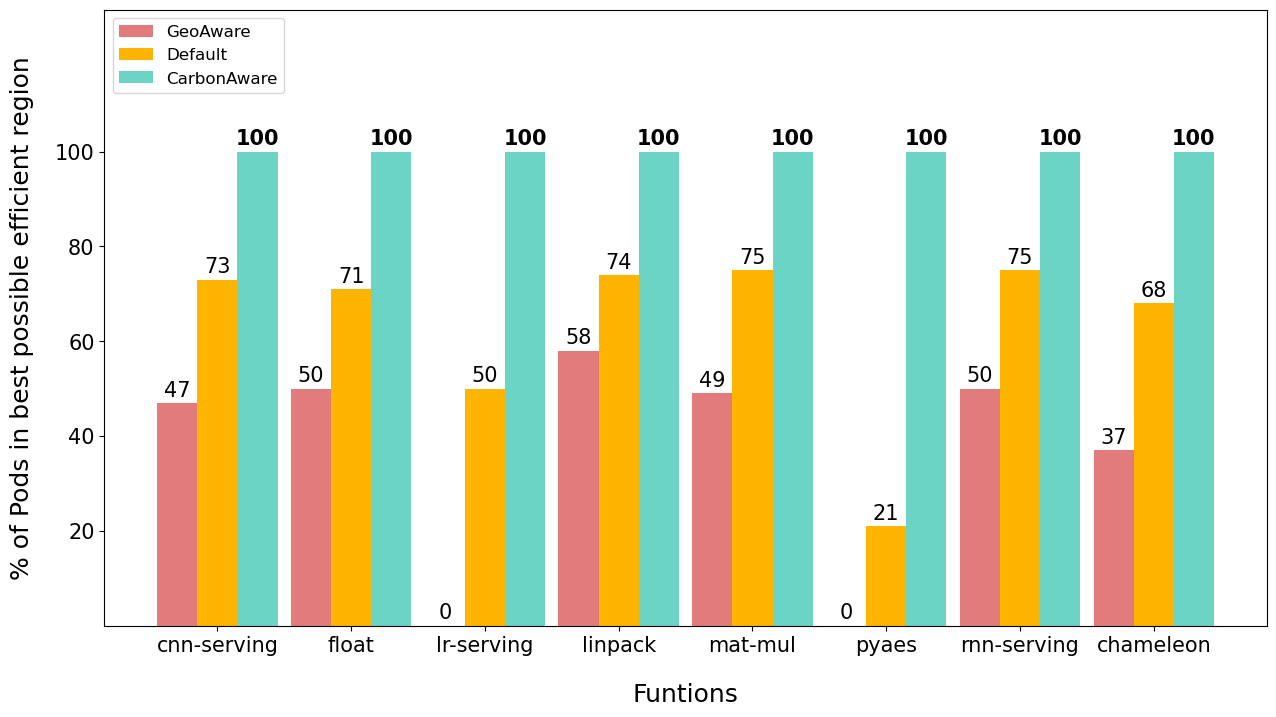

In [49]:
from matplotlib import rc, rcParams
rc('font', weight='normal')
fig0, ax0 = plt.subplots(figsize=(15,8))

x = np.arange(len(functions_full))
width = 0.3

threads_geo = ax0.bar(x - width * 1, pod_placement_geo, width, label='GeoAware', color='#e27c7c', alpha=1)
threads_default = ax0.bar(x + width * 0, pod_placement_default, width, label='Default', color='#ffb400', alpha=1)
threads_carbon = ax0.bar(x + width * 1, pod_placement_carbon, width, label='CarbonAware', color='#6cd4c5', alpha=1)

ax0.set_xlabel('Funtions', size=18.0)
ax0.set_ylabel('% of Pods in best possible efficient region', size=18.0)
#ax.tick_params(axis='x', labelsize=6)
ax0.set_xticks(x, rotation=0, fontsize=2)
ax0.set_xticklabels(functions_full, rotation=0, fontsize=2)

ticks = [20, 40, 60, 80, 100]
ax0.set_yticks(ticks)
ax0.set_yticklabels(ticks)

ax0.legend(prop={'size': 12}, loc='upper left', ncol=1)

ax0.bar_label(threads_default, padding=2, size=15)
ax0.bar_label(threads_geo, padding=2, size=15)
ax0.bar_label(threads_carbon, padding=2, size=15, fontweight='bold')

ax0.set_ylim([0, 130])

ax0.tick_params(axis='both', labelsize = 15.0)
ax0.xaxis.labelpad = 20
ax0.yaxis.labelpad = 15

#ax.grid(axis="both", color="0.8", linestyle='-', linewidth=1)
ax0.set_axisbelow(True)

fig0.savefig('pod_placement.png', dpi=300)

In [54]:
carbon_default = []
carbon_geo = []
geo_default = []

for i in range(len(default_resp_time)):
    carbon_default.append(get_change1(pod_placement_carbon[i], pod_placement_default[i]))
    carbon_geo.append(get_change1(pod_placement_carbon[i], pod_placement_geo[i]))
    geo_default.append(get_change1(pod_placement_default[i], pod_placement_geo[i]))
    
print(Average(carbon_default))
print(carbon_default)
print(Average(carbon_geo))
print(carbon_geo)
print(geo_default)
print(Average(geo_default))

36.625
[27.0, 28.999999999999996, 50.0, 26.0, 25.0, 79.0, 25.0, 32.0]
63.625
[53.0, 50.0, 100.0, 42.0, 51.0, 100.0, 50.0, 63.0]
[35.61643835616438, 29.577464788732392, 100.0, 21.62162162162162, 34.66666666666667, 100.0, 33.33333333333333, 45.588235294117645]
50.0504700075795


In [56]:

carbon_default = []
carbon_geo = []
geo_default = []

for i in range(len(default_resp_time)):
    carbon_default.append(get_change1(emission_carbon_int_mg[i], emission_default_int_mg[i]))
    carbon_geo.append(get_change1(emission_carbon_int_mg[i], emission_geo_int_mg[i]))
    geo_default.append(get_change1(emission_default_int_mg[i], emission_geo_int_mg[i]))

print(Average(carbon_default))
print(carbon_default)
print(Average(carbon_geo))
print(carbon_geo)
print(geo_default)
print(Average(geo_default))

8.629259430290462
[17.647058823529413, 17.142857142857142, 6.666666666666667, 7.758620689655173, 3.731343283582089, 2.831672784478238, 7.12682379349046, 6.129032258064516]
17.82645903292046
[27.450980392156865, 28.57142857142857, 17.142857142857142, 17.24137931034483, 10.696517412935323, 11.588883062401678, 13.468013468013467, 16.451612903225808]
[8.333333333333332, 9.75609756097561, 9.821428571428571, 8.799999999999999, 6.71462829736211, 8.516063233044365, 5.919329491880566, 9.72644376899696]
8.448415532127688
